In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import eda_helper_functions
import missingno as msno
%matplotlib inline

from sklearn.ensemble import IsolationForest

In [2]:
#!python --version

# Read The Training Data
We'll do eda on training data only

In [3]:
file_path = r"C:\Users\abhid\Desktop\campusx\flightprice_sagemaker\data\train.csv"

train = pd.read_csv(file_path)

In [4]:
train.head(3)

,airline,date_of_journey,source,destination,dep_time,arrival_time,total_stops,additional_info,duration_min,price
0,Jet Airways,2019-05-27,Delhi,Cochin,20:55:00,12:35:00,1,In-flight meal not included,940,12898
1,Jet Airways,2019-06-12,Kolkata,Banglore,18:55:00,16:20:00,1,No Info,1285,13044
2,Air India,2019-05-18,Delhi,Cochin,09:45:00,09:25:00,2,No Info,1420,10975


## Fixing Data Types

In [5]:
train.dtypes

airline            object
date_of_journey    object
source             object
destination        object
dep_time           object
arrival_time       object
total_stops         int64
additional_info    object
duration_min        int64
price               int64
dtype: object

In [6]:
train['date_of_journey'] = pd.to_datetime(train['date_of_journey'])
train['dep_time'] = pd.to_datetime(train['dep_time'])
train['arrival_time'] = pd.to_datetime(train['arrival_time'])

C:\Users\abhid\AppData\Local\Temp\ipykernel_12720\351326211.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['dep_time'] = pd.to_datetime(train['dep_time'])
C:\Users\abhid\AppData\Local\Temp\ipykernel_12720\351326211.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['arrival_time'] = pd.to_datetime(train['arrival_time'])


In [7]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
total_stops                 int64
additional_info            object
duration_min                int64
price                       int64
dtype: object

## High Level Summary of the Data

In [8]:
train.describe()

,date_of_journey,dep_time,arrival_time,total_stops,duration_min,price
count,6694,6694,6694,6694.000000,6694.000000,6694.000000
mean,2019-05-04 11:43:39.061846528,2024-06-07 12:52:14.493576448,2024-06-07 13:48:25.751419136,0.812668,637.633702,9092.553331
min,2019-03-01 00:00:00,2024-06-07 00:20:00,2024-06-07 00:05:00,0.000000,75.000000,1759.000000
25%,2019-03-27 00:00:00,2024-06-07 08:00:00,2024-06-07 08:50:00,0.000000,170.000000,5277.000000
50%,2019-05-15 00:00:00,2024-06-07 11:40:00,2024-06-07 14:05:00,1.000000,515.000000,8372.000000
75%,2019-06-06 00:00:00,2024-06-07 18:05:00,2024-06-07 19:15:00,1.000000,925.000000,12373.000000
max,2019-06-27 00:00:00,2024-06-07 23:55:00,2024-06-07 23:55:00,3.000000,2860.000000,79512.000000
std,NaN,NaN,NaN,0.658143,504.395941,4670.489223


In [9]:
train.describe(include = 'O')

,airline,source,destination,additional_info
count,6694,6694,6694,6694
unique,9,5,5,8
top,Jet Airways,Delhi,Cochin,No Info
freq,2387,2781,2781,5226


## Missing Value Inspection

<Axes: >

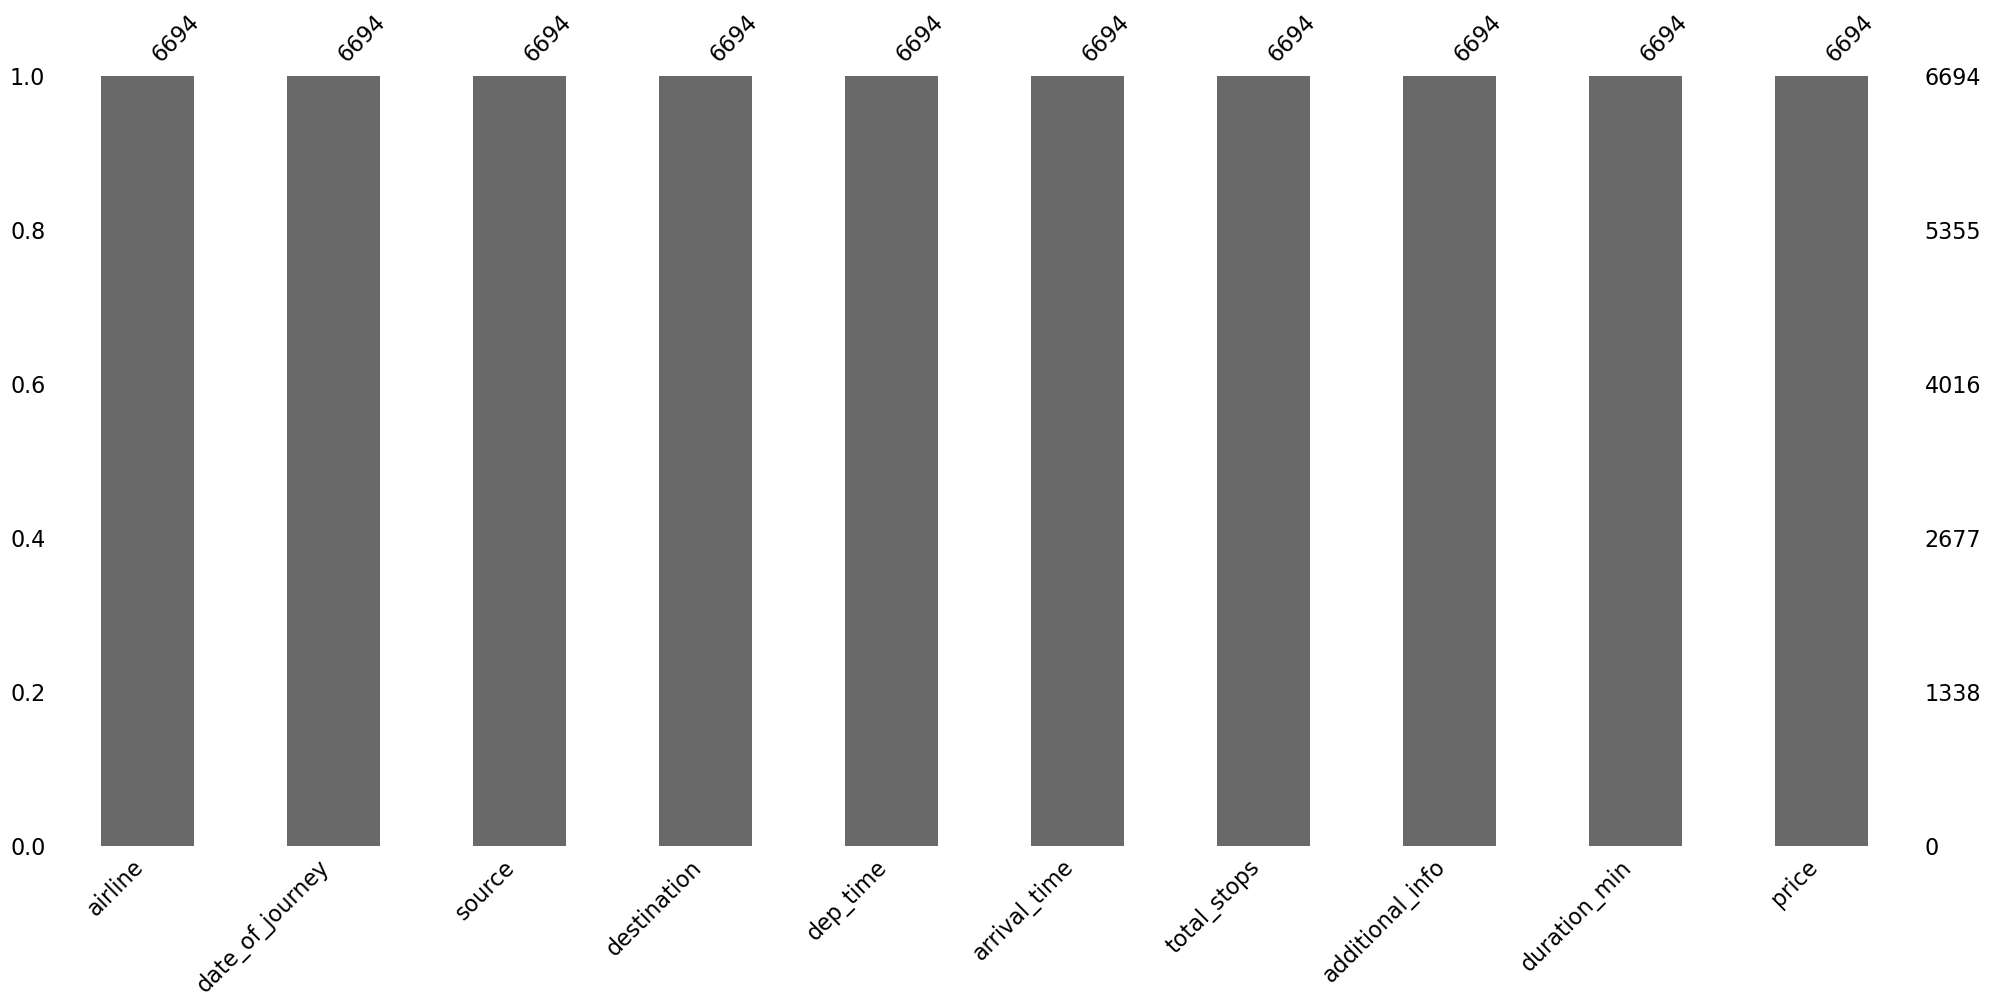

In [10]:
msno.bar(train)

## High Level Analysis of Outliers

In [11]:
forest = IsolationForest(n_estimators = 50,random_state = 28)

outlier = forest.fit_predict(train.drop(columns = 'price').select_dtypes(include = 'number'))

In [12]:
train['outlier'] = outlier

In [13]:
train.query('outlier==-1')

,airline,date_of_journey,source,destination,dep_time,arrival_time,total_stops,additional_info,duration_min,price,outlier
2,Air India,2019-05-18,Delhi,Cochin,2024-06-07 09:45:00,2024-06-07 09:25:00,2,No Info,1420,10975,-1
3,Indigo,2019-06-03,Mumbai,Hyderabad,2024-06-07 21:20:00,2024-06-07 22:50:00,0,No Info,90,2227,-1
4,Jet Airways,2019-04-01,Mumbai,Hyderabad,2024-06-07 02:55:00,2024-06-07 04:20:00,0,No Info,85,5678,-1
7,Jet Airways,2019-05-09,Delhi,Cochin,2024-06-07 23:05:00,2024-06-07 04:25:00,2,No Info,1760,15129,-1
8,Jet Airways,2019-06-12,Kolkata,Banglore,2024-06-07 14:05:00,2024-06-07 10:05:00,1,No Info,1200,13044,-1
...,...,...,...,...,...,...,...,...,...,...,...
6678,Jet Airways,2019-03-24,Banglore,New Delhi,2024-06-07 05:45:00,2024-06-07 10:25:00,1,In-flight meal not included,280,8147,-1
6681,Jet Airways,2019-06-21,Delhi,Cochin,2024-06-07 11:00:00,2024-06-07 14:15:00,0,In-flight meal not included,195,4256,-1
6682,Jet Airways,2019-05-01,Kolkata,Banglore,2024-06-07 09:35:00,2024-06-07 14:25:00,1,No Info,1730,11467,-1
6687,Jet Airways,2019-06-15,Delhi,Cochin,2024-06-07 21:25:00,2024-06-07 12:35:00,2,In-flight meal not included,910,9905,-1


## Pair Plots

C:\Users\abhid\anaconda3\envs\sagenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\abhid\anaconda3\envs\sagenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\abhid\anaconda3\envs\sagenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\abhid\anaconda3\envs\sagenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

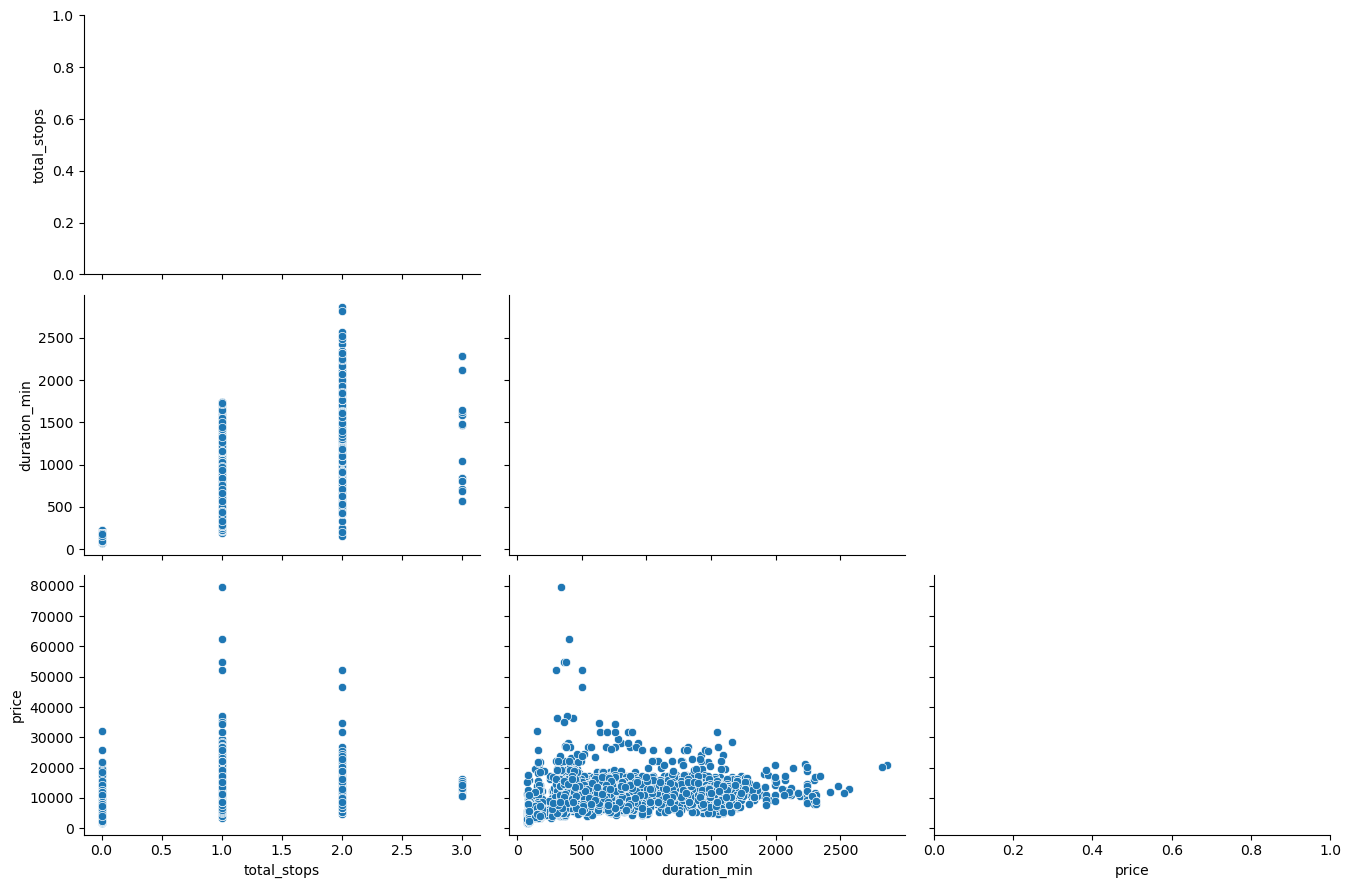

In [14]:
eda_helper_functions.pair_plots(train.drop(columns = 'outlier'))

## Correlation Analysis

<Axes: >

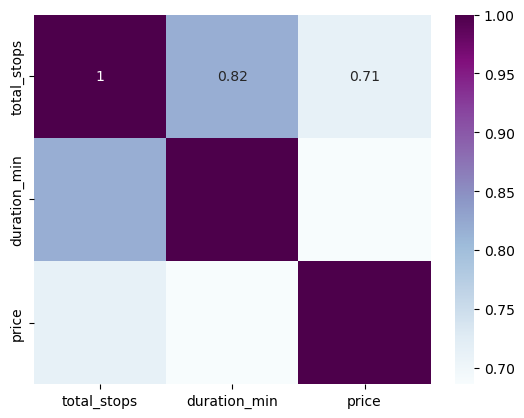

In [15]:
sns.heatmap(train.drop(columns = 'outlier').select_dtypes(include = 'number').corr(method = 'spearman'),annot = True,cmap='BuPu')

C:\Users\abhid\anaconda3\envs\sagenv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


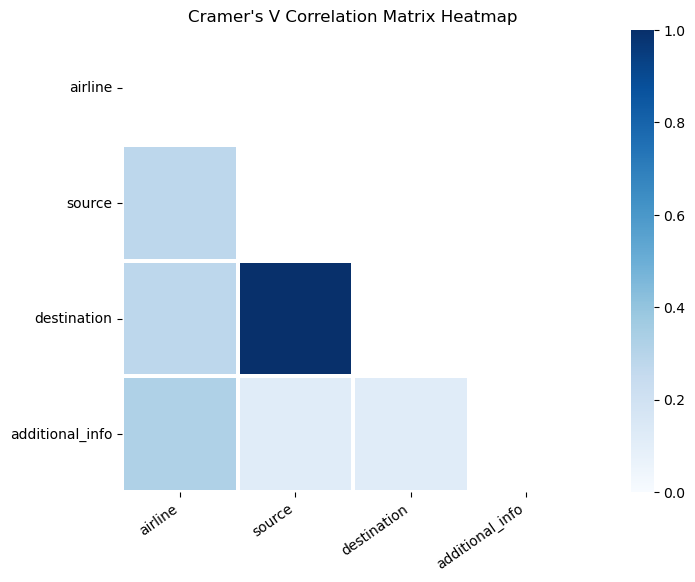

In [16]:
# for finding correlation between categorical variables
eda_helper_functions.cramersV_heatmap(train)

## Detailed Analysis

In [17]:
print('Features avaliable: ',[i for i in train.columns])

Features avaliable:  ['airline', 'date_of_journey', 'source', 'destination', 'dep_time', 'arrival_time', 'total_stops', 'additional_info', 'duration_min', 'price', 'outlier']


### Ananalyis of Airline Feature

In [18]:
eda_helper_functions.cat_summary(train,'airline')

0             Jet Airways
1             Jet Airways
2               Air India
3                  Indigo
4             Jet Airways
              ...        
6689             Spicejet
6690    Multiple Carriers
6691            Air India
6692             Air Asia
6693    Multiple Carriers
Name: airline, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,9
top,Jet Airways
freq,2387


,count,percentage
category,,
Jet Airways,2387,0.356588
Indigo,1281,0.191365
Air India,1087,0.162384
Multiple Carriers,768,0.114730
Spicejet,534,0.079773
Vistara,301,0.044966
Air Asia,215,0.032118
Goair,120,0.017927
Trujet,1,0.000149


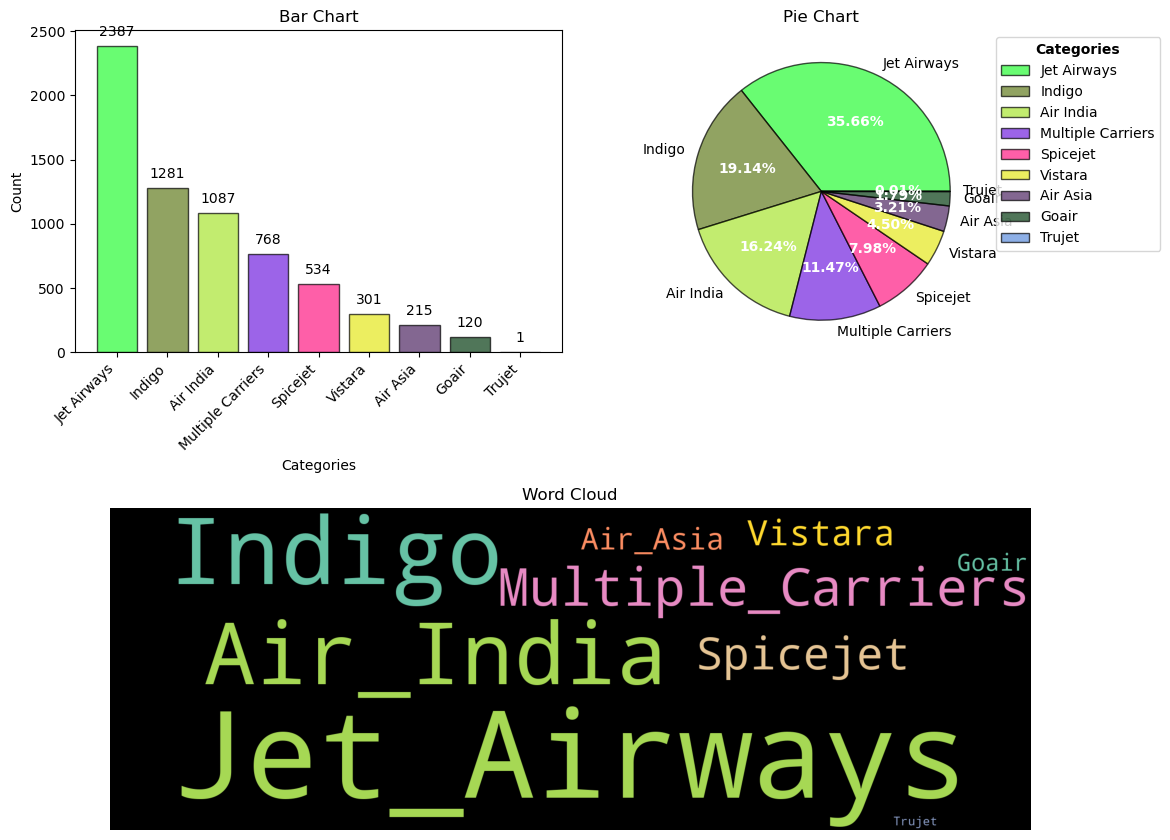

In [19]:
eda_helper_functions.cat_univar_plots(train, "airline")

### Idea: We can retain categories above 4% frequency and club all the others together as 'Other'

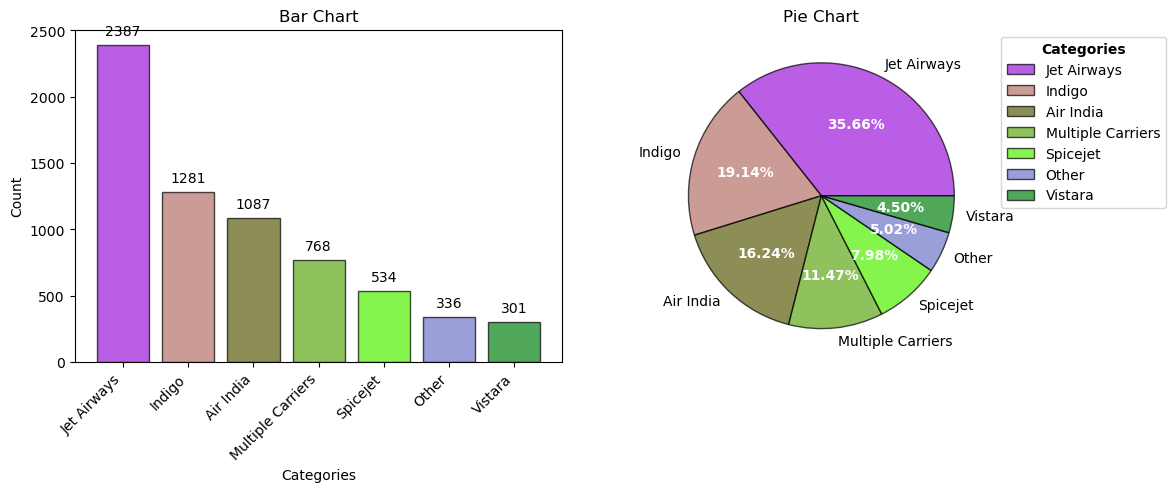

In [20]:
eda_helper_functions.cat_univar_plots(train, "airline", k = 6,show_wordcloud = False)

## Bivariate Analysis of Airline wrt Price

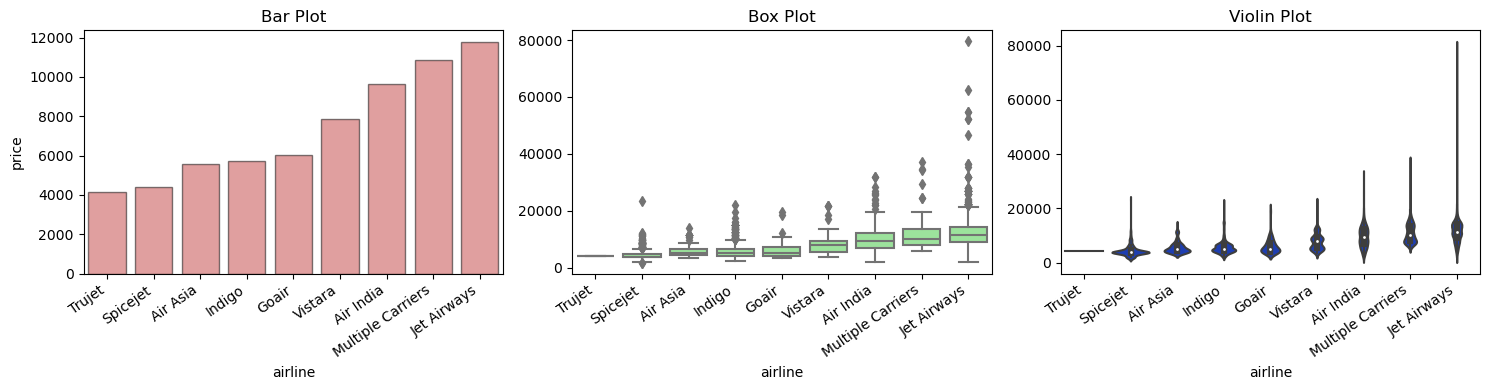

In [21]:
eda_helper_functions.num_cat_bivar_plots(train,num_var='price',cat_var='airline')

## Hypothesi Testing of Airline feature

In [22]:
eda_helper_functions.num_cat_hyp_testing(train,cat_var='airline',num_var = 'price')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 446.0707433362749
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3062.6099595740966
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


### We may make use of Seaborn Facetgrid to check the relationship between 3 variables: Price, Airline and destination

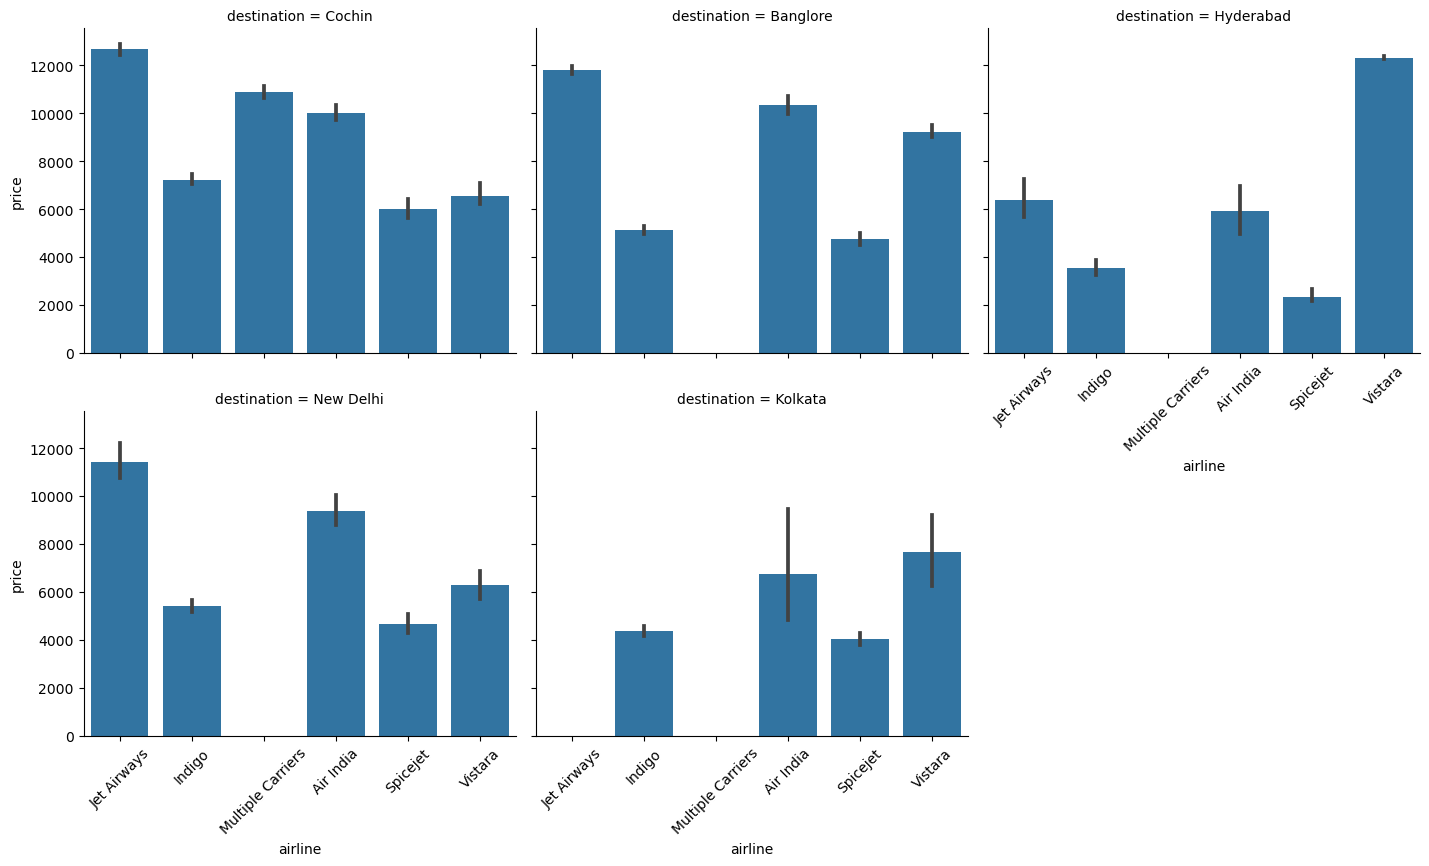

In [23]:
airline_grid = sns.FacetGrid(train,col = 'destination',height = 4, aspect=1.2,sharey = True,col_wrap=3)

airline_grid.map(sns.barplot,'airline','price',order = ['Jet Airways','Indigo','Multiple Carriers','Air India','Spicejet','Vistara'])

# rotating xticks
for ax in airline_grid.axes:
    ax.tick_params(axis='x', rotation=45)
    
plt.show()

### We may make use of Seaborn Facetgrid to check the relationship between 3 variables: Price, Airline and source

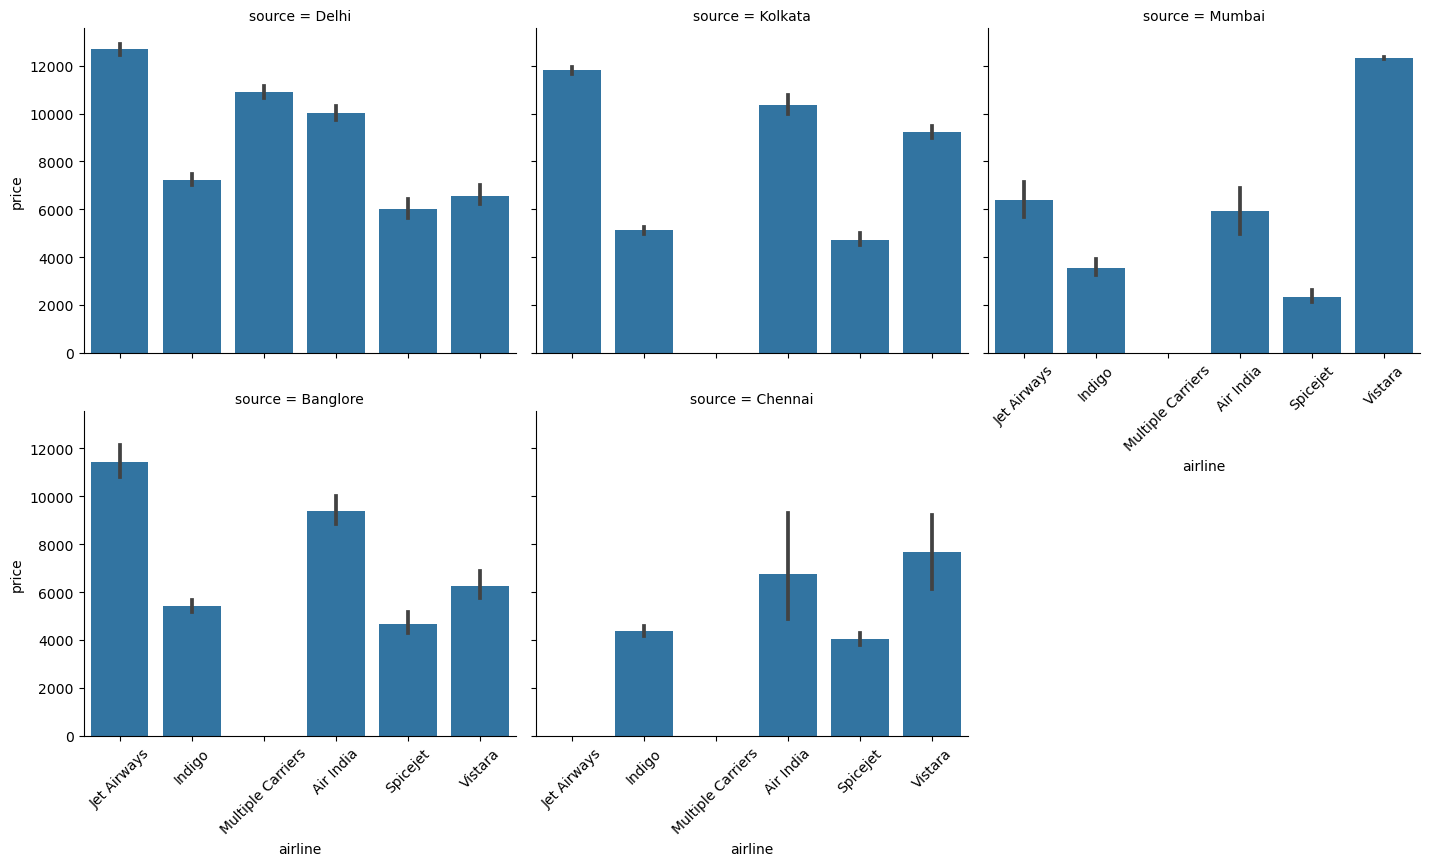

In [24]:
airline_grid = sns.FacetGrid(train,col = 'source',height = 4, aspect=1.2,sharey = True,col_wrap=3)

airline_grid.map(sns.barplot,'airline','price',order = ['Jet Airways','Indigo','Multiple Carriers','Air India','Spicejet','Vistara'])

# rotating xticks
for ax in airline_grid.axes:
    ax.tick_params(axis='x', rotation=45)
    
plt.show()

## Detailed Analysis of Date of Journey

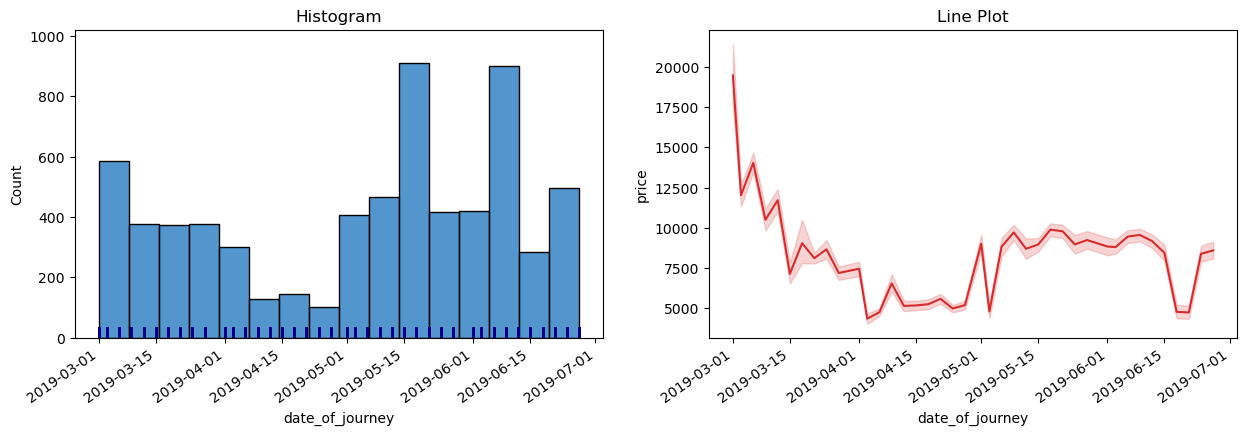

In [25]:
eda_helper_functions.dt_univar_plots(train,var = 'date_of_journey',target= 'price')

## Monthwise Price Trends

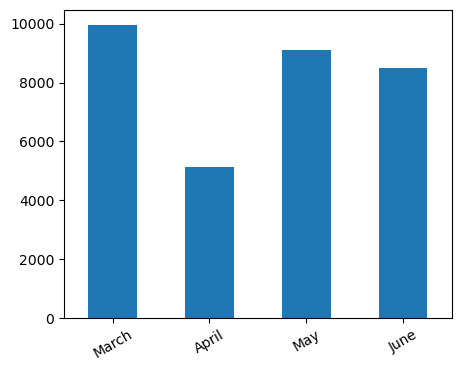

In [26]:
train.groupby(pd.Grouper(key = 'date_of_journey',freq = 'M'))['price']\
.median().set_axis(['March','April','May','June']).plot(kind = 'bar',figsize = (5,4))
plt.xticks(rotation = 30)
plt.show()

### Weekwise Price Trends

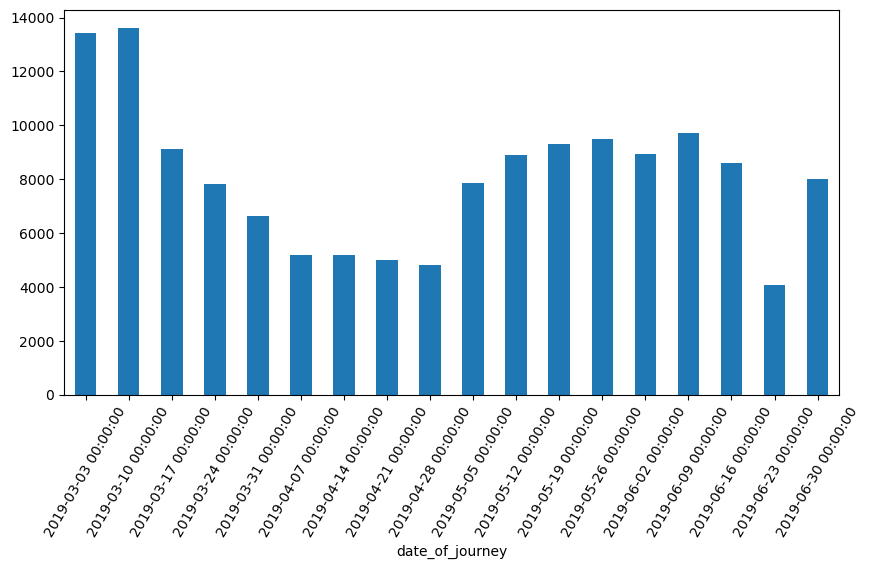

In [27]:
train.groupby(pd.Grouper(key = 'date_of_journey',freq = 'W'))['price']\
.median().plot(kind = 'bar',figsize = (10,5))
#.set_axis(['March','April','May','June'])\
#.plot(kind = 'bar',figsize = (5,4))
plt.xticks(rotation = 60)
plt.show()

## Time Series Analysis of Price wrt to Source City

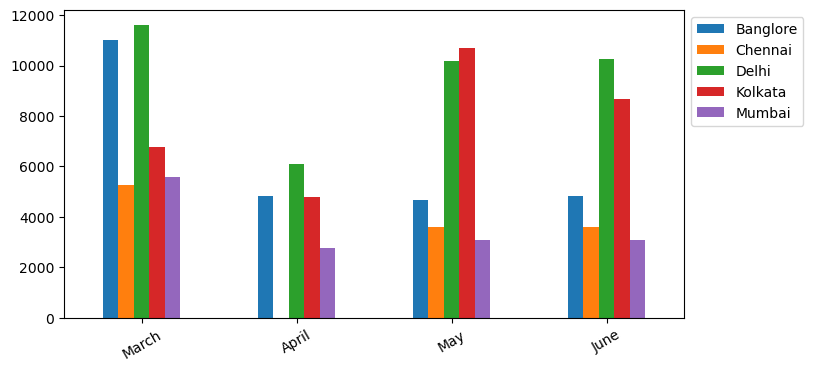

In [28]:
train.groupby([pd.Grouper(key = 'date_of_journey',freq = 'M'),'source'])['price'].median()\
.unstack().set_axis(['March','April','May','June'])\
.plot(kind = 'bar',figsize = (8,4))

plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))
plt.xticks(rotation = 30)
plt.show()

## EDA of Departure Time

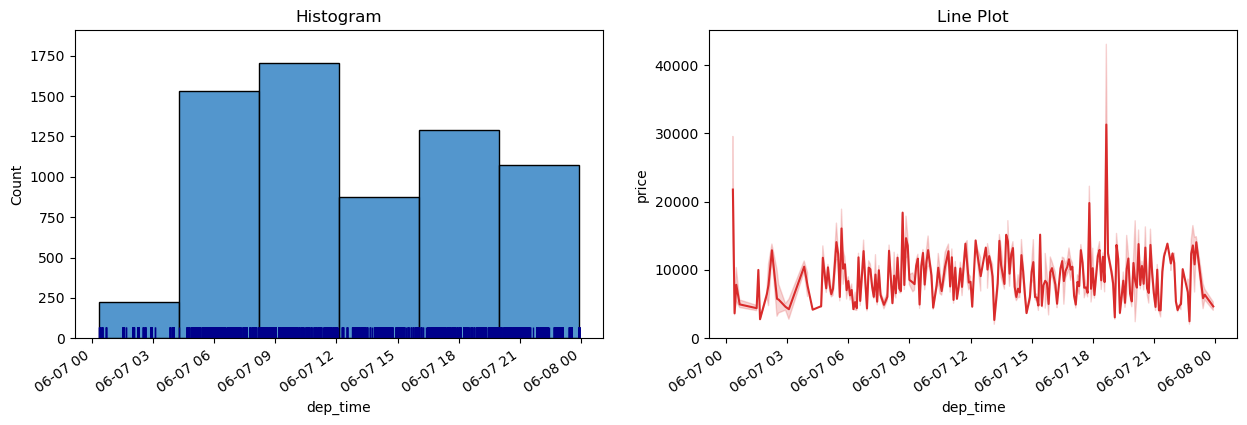

In [29]:
eda_helper_functions.dt_univar_plots(train,'dep_time','price',bins = 6)

In [30]:
hour = pd.Series(train['dep_time'].dt.hour)
hour

0       20
1       18
2        9
3       21
4        2
        ..
6689    11
6690    10
6691    12
6692     7
6693     8
Name: dep_time, Length: 6694, dtype: int32

In [31]:
condlist = [hour.between(5,12,inclusive = 'left'),
            hour.between(12,18,inclusive = 'left'),
            hour.between(18,24,inclusive = 'left')]             
                      
choicelist = ['morning','afternoon','evening']
hour_cat = pd.Series(np.select(condlist,choicelist,default = 'red-eye'))
   

In [32]:
hour_cat

0         evening
1         evening
2         morning
3         evening
4         red-eye
          ...    
6689      morning
6690      morning
6691    afternoon
6692      morning
6693      morning
Length: 6694, dtype: object

In [33]:
train = train.join(hour_cat.rename('hour_cat'))

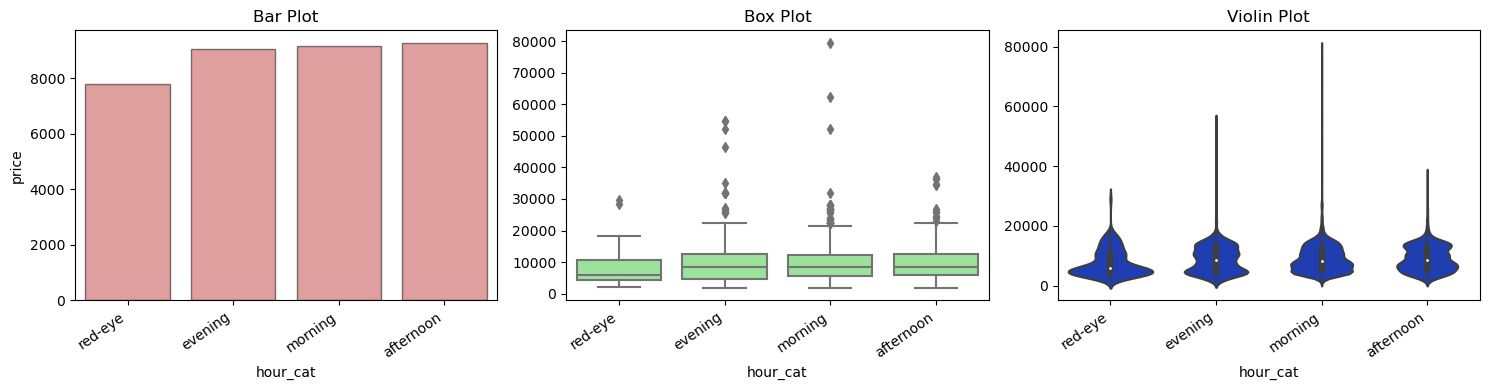

In [34]:
eda_helper_functions.num_cat_bivar_plots(train,num_var='price',cat_var='hour_cat')

## Analysis of Duration

In [35]:
eda_helper_functions.num_summary(train,'duration_min')

0        940
1       1285
2       1420
3         90
4         85
        ... 
6689     435
6690     930
6691    1180
6692     330
6693     660
Name: duration_min, Length: 6694, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,value
percentile,
0,75.00
5,90.00
10,145.00
25,170.00
50,515.00
75,925.00
90,1443.50
95,1596.75
99,1925.00


,value
mean,637.633702
trimmed mean (5%),603.744607
trimmed mean (10%),575.500373
median,515.000000


,value
var,254415.264879
std,504.395941
IQR,755.000000
mad,345.000000
coef_variance,0.791043


,value
skewness,0.902919
kurtosis,-0.006774


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.4148237388305426e-56
Test Statistic       : 0.8882864294027539
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 242.1831336451669
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


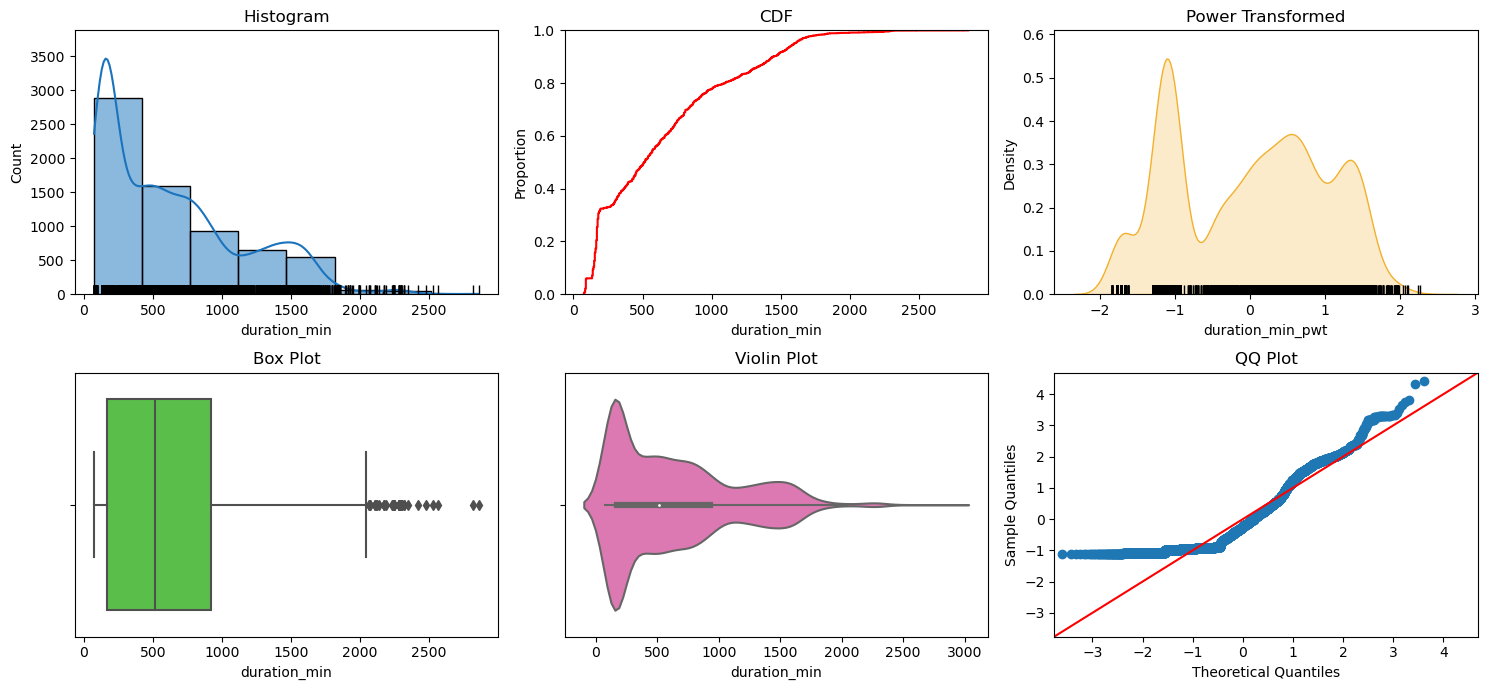

In [36]:
eda_helper_functions.num_univar_plots(train,'duration_min',bins = 8)

## Relation between duration and Price

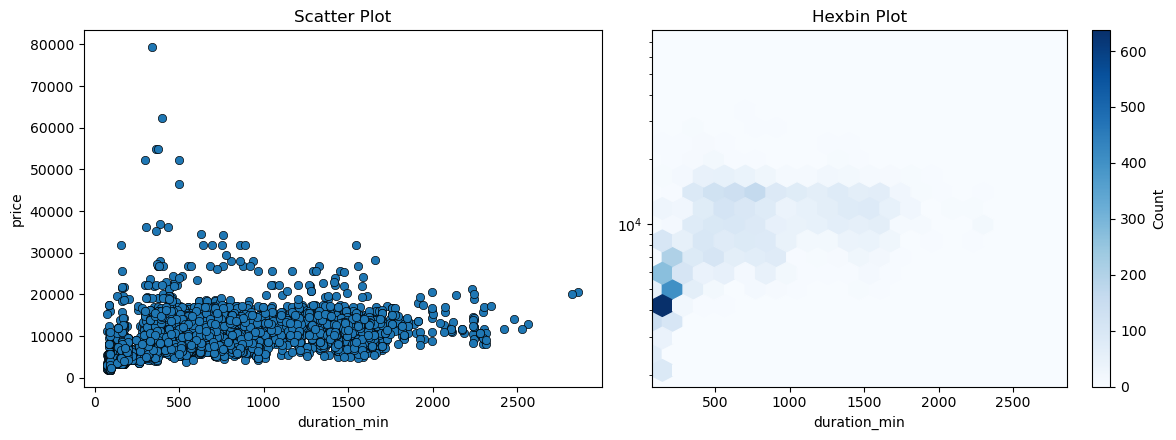

In [37]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration_min",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

### Hypothesis Test to check if duration and price are correlated

In [38]:
eda_helper_functions.num_num_hyp_testing(train,'duration_min','price')

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.4883580202726658
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration_min and price are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6859367616306481
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration_min and price are correlated


## Effect of source and total_stops on duration and price

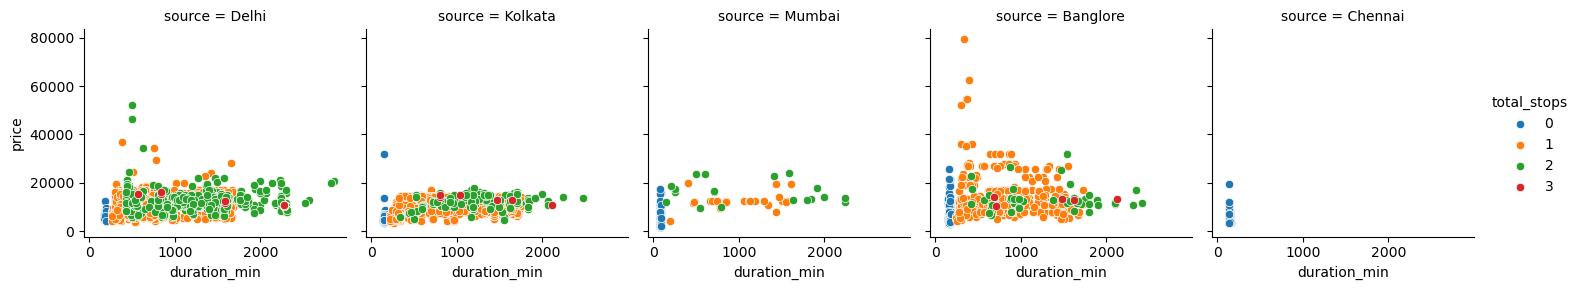

In [39]:
g = sns.FacetGrid(train, col ='source',hue = 'total_stops', sharey = True)
g.map(sns.scatterplot, 'duration_min', 'price')
g.add_legend()

## Effect of source and time of day on duration and price

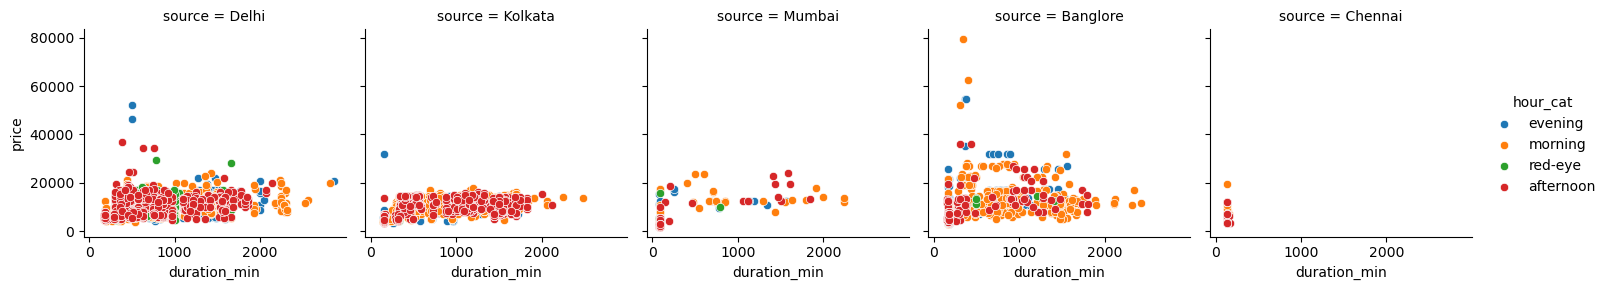

In [40]:
g = sns.FacetGrid(train, col ='source',hue = 'hour_cat', sharey = True)
g.map(sns.scatterplot, 'duration_min', 'price')
g.add_legend()

## Automated EDA using ydata-profiling

In [41]:
from ydata_profiling import ProfileReport

In [42]:
report = ProfileReport(train)

In [43]:
report.to_file('eda_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]